In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind,wilcoxon
import json
import statsmodels.api as sm
import pylab as py

In [2]:
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
# home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
# home_dir = '../../../2022_online/'
home_dir = './data/2022_online/'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
# out_dir = home_dir + 'figures/cogsci_2022/'
out_dir = './figures_dk/'
R_out_dir = home_dir + 'R_analysis_data/'

In [4]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index()

## error rate (fixed metric)

In [5]:

undo_level = data_choice_level[data_choice_level['condition']==1].copy().reset_index()
basic_level = data_choice_level[data_choice_level['condition']==0].copy().reset_index()

mas_gain = []
for sub in range(100):
    mas_gain_length = []
    print('sub{}'.format(sub))
    dat_sbj_undo  = undo_level[undo_level['subjects']==sub].sort_values(["puzzleID","index"])
    dat_sbj_basic = basic_level[basic_level['subjects']==sub].sort_values(["puzzleID","index"])

    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_undo_pzi = dat_sbj_undo[dat_sbj_undo['puzzleID'] == pzi].reset_index()
        dat_sbj_basic_pzi = dat_sbj_basic[dat_sbj_basic['puzzleID'] == pzi].reset_index()

        mas_gain_length.append(dat_sbj_undo_pzi['currMas'].iloc[-1] - dat_sbj_basic_pzi['currMas'].iloc[-1])
    mas_gain.append(mas_gain_length)
mas_gain = np.array(mas_gain)

sub0
sub1
sub2
sub3
sub4
sub5
sub6
sub7
sub8
sub9
sub10
sub11
sub12
sub13
sub14
sub15
sub16
sub17
sub18
sub19
sub20
sub21
sub22
sub23
sub24
sub25
sub26
sub27
sub28
sub29
sub30
sub31
sub32
sub33
sub34
sub35
sub36
sub37
sub38
sub39
sub40
sub41
sub42
sub43
sub44
sub45
sub46
sub47
sub48
sub49
sub50
sub51
sub52
sub53
sub54
sub55
sub56
sub57
sub58
sub59
sub60
sub61
sub62
sub63
sub64
sub65
sub66
sub67
sub68
sub69
sub70
sub71
sub72
sub73
sub74
sub75
sub76
sub77
sub78
sub79
sub80
sub81
sub82
sub83
sub84
sub85
sub86
sub87
sub88
sub89
sub90
sub91
sub92
sub93
sub94
sub95
sub96
sub97
sub98
sub99


In [6]:
mas_gain_persub = mas_gain.mean(axis=1)

In [7]:
data_error_rate = []

for sub in range(100):
    dat_sbj = sc_data_choice_level[sc_data_choice_level['subjects'] == sub].sort_values(["puzzleID", "index"])
    data_error_rate_puzzle = []
    print(sub)

    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()

        firstUndo_idx = dat_sbj_pzi[dat_sbj_pzi["firstUndo"] == 1].index
        path_bf_undo = dat_sbj_pzi["currMas"][firstUndo_idx - 1]  # the mas of the state before undo

        lastUndo_idx = dat_sbj_pzi[dat_sbj_pzi["lastUndo"] == 1].index
        path_af_undo = dat_sbj_pzi["currMas"][lastUndo_idx + 1]  # the mas of the state after undo

        submit_idx = pd.Int64Index([len(dat_sbj_pzi) - 1])

        if len(firstUndo_idx) > 0:
            if len(firstUndo_idx) == 1:  #
                t_idx = (firstUndo_idx[1:] - 1).to_list()
                t_idx.append(submit_idx.item())
                seq_bf = dat_sbj_pzi["path"][firstUndo_idx - 1]
                seq_af = dat_sbj_pzi["path"][t_idx]
                seq_im = dat_sbj_pzi["path"][lastUndo_idx]
                currmas_bf = dat_sbj_pzi["currMas"][lastUndo_idx - 1]
                currmas_af = dat_sbj_pzi["currMas"][lastUndo_idx + 1]


            else:
                seq_bf = dat_sbj_pzi["path"][firstUndo_idx - 1]
                t_idx = (firstUndo_idx[1:] - 1).to_list()
                t_idx.append(submit_idx.item())
                seq_af = dat_sbj_pzi["path"][t_idx]
                seq_im = dat_sbj_pzi["path"][lastUndo_idx]
                currmas_bf = dat_sbj_pzi["currMas"][lastUndo_idx - 1]
                currmas_af = dat_sbj_pzi["currMas"][lastUndo_idx + 1]

            seq_im = seq_im.reset_index()
            pathStr_im = [seq_im.loc[i].path.strip('[').strip(']') for i in range(len(seq_im))]
            pathList_im = [[int(i) for i in pathStr_im[j].split(', ')]  for j in range(len(pathStr_im))]
            pathStr_im = [" ".join([str(a) for a in pathList_im[j]]) for j in range(len(seq_im))]

            seq_bf = seq_bf.reset_index()
            pathStr_bf = [seq_bf.loc[i].path.strip('[').strip(']') for i in range(len(seq_bf))]
            pathList_bf = [[int(i) for i in pathStr_bf[j].split(', ')]  for j in range(len(pathStr_bf))]
            pathStr_bf = [" ".join([str(a) for a in pathList_bf[j]]) for j in range(len(seq_bf))]

            seq_af = seq_af.reset_index()
            pathStr_af = [seq_af.loc[i].path.strip('[').strip(']') for i in range(len(seq_af))]
            pathList_af = [[int(i) for i in pathStr_af[j].split(', ')]  for j in range(len(pathStr_af))]
            pathStr_af = [" ".join([str(a) for a in pathList_af[j]]) for j in range(len(seq_af))]

            firstundoidx = firstUndo_idx.to_numpy()-1
            lastundoidx = lastUndo_idx.to_numpy()
            tidx = np.array(t_idx) + 1
            tidx[-1] -= 1

            length_error_rate = []

            for i in range(len(firstundoidx)):
                currnct = dat_sbj_pzi["currNumCities"][firstundoidx[i]:tidx[i]].to_numpy()
                currnct2 = currnct.copy()
                currmas = dat_sbj_pzi["currMas"][firstundoidx[i]:tidx[i]].to_numpy()
                currnct = currnct - min(currnct)
                currpath = dat_sbj_pzi["path"][firstundoidx[i]:tidx[i]].to_list()
                currpath = [currpath[i].strip('[').strip(']') for i in range(len(currpath))]
                currpath = [[int(i) for i in currpath[j].split(', ')] for j in range(len(currpath))]

                currRT = dat_sbj_pzi["RT"][firstundoidx[i]:tidx[i]].to_numpy()
                currundoRT = dat_sbj_pzi["undoRT"][firstundoidx[i]:tidx[i]].to_numpy()

                seq_im = dat_sbj_pzi["path"][lastundoidx[i]]
                pathStr_im = seq_im.strip('[').strip(']')
                pathList_im = [int(i) for i in pathStr_im.split(', ')]

                currpath = [np.setdiff1d(currpath[i], pathList_im).tolist() for i in range(len(currpath))]
                pathafter = [np.setdiff1d(pathList_af[i], pathList_im).tolist() for i in range(len(pathList_af))]

                idx_2 = np.where(currnct==0)[0]
                if len(idx_2)>1:
                    idx_2 = idx_2[0]

                if currnct[-1]==0:
                    # this means this perseon undo and submitted
                    continue
                else:
                    length_error_rate.append([np.abs(currmas[idx_2]-currmas[0]).squeeze()/currnct[0], np.abs(currmas[idx_2]-currmas[-1]).squeeze()/currnct[-1], sub, pzi]) # undo redo subid pzi

            data_error_rate_puzzle.extend(length_error_rate)

    data_error_rate.extend(data_error_rate_puzzle)
data_error_rate = np.array(data_error_rate)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [8]:
print([np.setdiff1d(pathList_af[i], pathList_im).tolist() for i in range(len(pathList_af))])

[[4, 7, 9, 23, 26, 28], [4, 7, 9, 11, 23, 24], [4, 7, 8, 9, 20, 23]]


2.2273182113548116e-14 97.0


/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_39434/2421498470.py:10: RuntimeWarning: Mean of empty slice
  error_rate_ = np.array([np.nanmean(data_error_rate[np.where(data_error_rate[:,2]==i)[0],:2], axis=0) for i in range(100)])


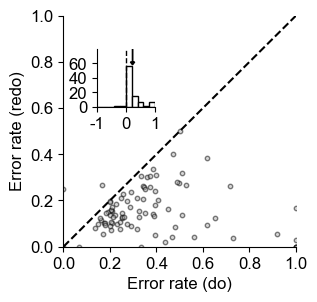

In [9]:
# scatter plot of time taken
%matplotlib inline
# set font and font size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

plt.figure(figsize=(3,3))

# average over subjects, which is third column
error_rate_ = np.array([np.nanmean(data_error_rate[np.where(data_error_rate[:,2]==i)[0],:2], axis=0) for i in range(100)])

valid_subidx = np.where(~np.isnan(error_rate_[:,0]))[0]

plt.scatter(error_rate_[valid_subidx,0], error_rate_[valid_subidx,1], color=[.7,.7,.7], s=10, alpha=0.5, edgecolor = 'k')

# # get plausible range of x and y and set xlim and ylim
# plt.xlim([0, 6])
# plt.ylim([0, 6])

plt.xlim([0, 1])
plt.ylim([0, 1])
#
# # set xticks and yticks
# plt.xticks([0,1,2,3,4,5,6])
# plt.yticks([0,1,2,3,4,5,6])

plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])

# set xand y label
plt.xlabel('Error rate (do)')
plt.ylabel('Error rate (redo)')
# title
# plt.title('Error magnitude')


# remove top and right frame
sns.despine()

# mid line
# plt.plot([0,6],[0,6], 'k--')
plt.plot([0,1],[0,1], 'k--')

# set xticks and yticks
# plt.xticks([0,5,10,15])
# plt.yticks([0,5,10,15])

# make inset and include hist_error_magnitude
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(plt.gca(), width="25%", height="25%", loc=2, borderpad=2)
axins.hist(error_rate_[valid_subidx,0]-error_rate_[valid_subidx,1], bins=np.linspace(-1,1,11), color='w', alpha=1, label='Undo Allowed', edgecolor='k')
# center line of histogram at x = 0
axins.plot([0,0],[0,80], 'k--', linewidth=1)
axins.arrow(np.mean(error_rate_[valid_subidx,0]-error_rate_[valid_subidx,1]), 80, 0, -18, head_width=0.15, head_length=4, fc='k', ec='k')

# statistical test between currmas_with_undo and currmas_without_undo
from scipy.stats import wilcoxon
stat, p = wilcoxon(error_rate_[valid_subidx,0], error_rate_[valid_subidx,1])
print(p,stat)

# set x and y lim of axins
axins.set_xlim([-1, 1])
axins.set_ylim([0,80])

# set x and y ticks of axins
axins.set_xticks([-1,0,1])

# set xtickslabel of axins
axins.set_xticklabels(['-1','0','1'])
axins.set_yticks([0,20,40,60])


# remove top and right frame
sns.despine()

# save figure
plt.savefig(out_dir + '/error_rate_doredo.png', dpi=300, bbox_inches='tight')


In [10]:
print(error_rate_[valid_subidx,1]-error_rate_[valid_subidx,0])

[-0.42337662 -0.28354037 -0.0578373  -0.525      -0.11536281 -0.52083333
 -0.23333333 -0.125      -0.37144661 -0.05336284 -0.10668498 -0.13262108
 -0.1136566  -0.4570028  -0.10720551 -0.05441097 -0.24310658 -0.09088771
 -0.0468502  -0.11104269 -0.21212121 -1.         -0.86111111 -0.07159864
 -0.0495873  -0.04084492 -0.18939394 -0.23958333 -0.13244048 -0.04908009
 -0.25542328 -0.25892857 -0.34278274 -0.16661491 -0.10426829  0.25
 -0.02549603 -0.69345238 -0.03821369 -0.07708333 -0.04013367 -0.06964286
 -0.22400794 -0.20825893 -0.39434524 -0.04804422 -0.12064626 -0.06680403
 -1.          0.         -0.00396825 -0.41666667 -0.0440396  -0.33333333
  0.         -0.19592934 -0.06666667 -0.07540355 -0.97291667  0.1
 -0.08666667 -0.05503663 -0.07380952 -0.13367347 -0.0952381  -0.13936252
 -1.         -0.19990663  0.         -0.11358025 -0.16688312 -0.02682292
 -0.03675997 -0.08253968 -0.20850631 -0.20166667 -0.10256283 -0.12997199
 -0.08423181 -0.15392157 -0.17298535 -1.66666667 -0.52357143 -0.

error rate(do) and error rate(redo): corr=0.179, p=0.092


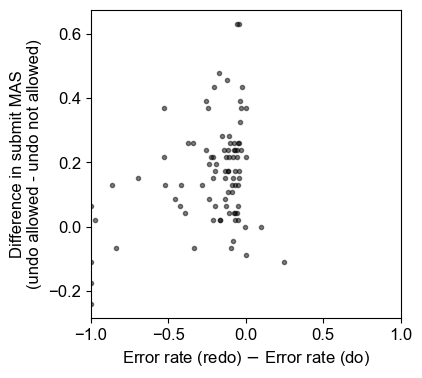

In [11]:
#scatter plot between error_rate_redo and error_rate_do
%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
fig, ax=plt.subplots(1,1,figsize=(4,4))

valid_subidx = np.where(~np.isnan(error_rate_[:,0]))[0]

ax.scatter( error_rate_[valid_subidx,1]-error_rate_[valid_subidx,0], mas_gain_persub[valid_subidx], color='k', marker='.', alpha=0.5)

# get corrleation and p value
from scipy.stats import pearsonr, spearmanr
# corr, p = pearsonr(error_rate_do[valid_subidx], error_rate_redo[valid_subidx])
# print('error rate(do) and error rate(redo): corr={:.3f}, p={:.3f}'.format(corr, p))
aa = error_rate_[valid_subidx,1]-error_rate_[valid_subidx,0]
valid_idx = np.where(~np.isnan(aa))[0]
corr, p = spearmanr(aa, mas_gain_persub[valid_subidx])
print('error rate(do) and error rate(redo): corr={:.3f}, p={:.3f}'.format(corr, p))

# xlabel, ylabel
ax.set_xlabel(r'Error rate (redo) $-$ Error rate (do)')
ax.set_ylabel('Difference in submit MAS\n(undo allowed - undo not allowed)')

# set xlim
ax.set_xlim([-1,1])

# save
fig.savefig(out_dir + 'error_rate_do_redo_masgain.png', transparent=True,
            bbox_inches='tight', pad_inches=0.1)